# Value Iteration

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('Load Packages')

Load Packages


# FrozenLake

In [2]:
env = gym.make('FrozenLake8x8-v1')

obs_space = env.observation_space
n_state = obs_space.n
print('Observation space')
print("Total {} states".format(n_state))

act_space = env.action_space
n_act = act_space.n
print('Action space')
print("Total {} actions".format(n_act))

Observation space
Total 64 states
Action space
Total 4 actions


### Value Iteration

Optimal value function will be found using Bellman optimality equation

$V^{*}(s) = \max_{a} \sum_{s'}[r(s,a,s')+\gamma V^{*}(s')]P(s'|s,a)$

Value iteration consists of three steps:

(1) Initial value is randomly initialized

(2) Update value function using Bellman optimality equation

(3) If infinite distance between updated value and current value is less than epsilon, then stop. Otherwise, repeat (2)


Value Iteration Compact
Computation Time : 0.48



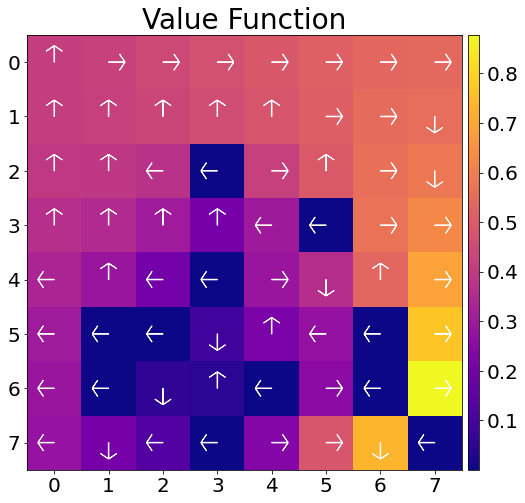

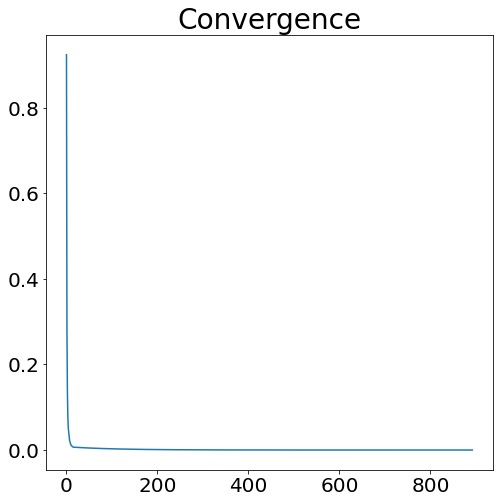

In [3]:
def value_iteration(env,gamma=0.99,epsilon=1e-6):
    # Extract World Information    
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    
    # Transition Probability
    P = env.unwrapped.P

    # Random Initail
    value = np.random.uniform(size=(n_state,1))
    error_list = []
    while True: 
        # Compute Q value    
        # For all states s
        # For all actions a
        # For all possible transitions s'
        # Bellman update
        # Compute maximum
        # Compute distance bewteen new value and prev value
        # Break if the terminate condition is satisfied
        break
            
    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1
    
    return policy, value, error_list

def plot_results(policy, value, fig_title="Value Function"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    im = plt.imshow(np.reshape(value,(8,8)),cmap='plasma')
    plt.title(fig_title,fontdict={'fontsize':28})  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="w",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="w",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="w",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="w",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()

def plot_errors(_error_list):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    
    plt.title("Convergence",fontdict={'fontsize':28})  
    plt.plot(_error_list)
        
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()
    
if __name__=='__main__': 
    print("Value Iteration Compact")
    import time
    start = time.time()
    policy, value, error_list = value_iteration(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    
    plot_results(policy, value)
    plot_errors(error_list)

### Effect of Discount Factor


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


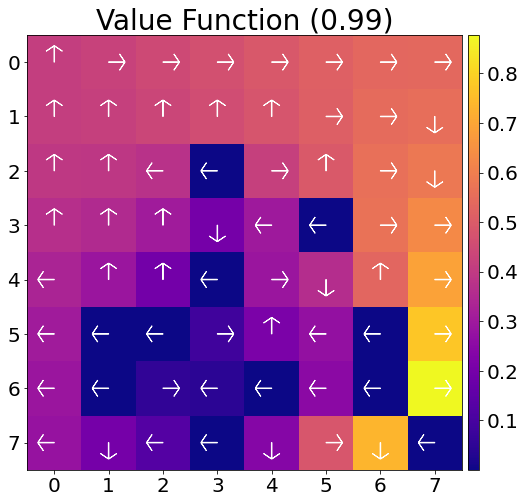

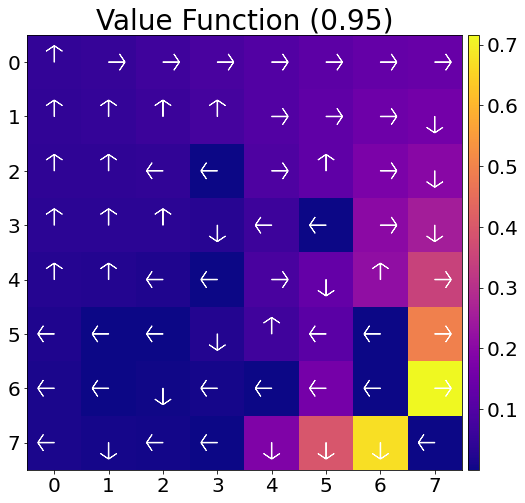

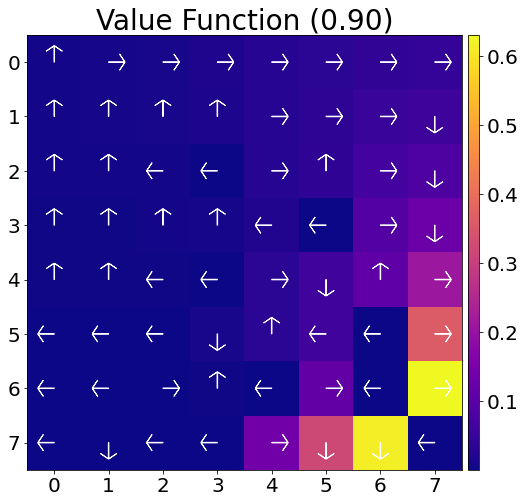

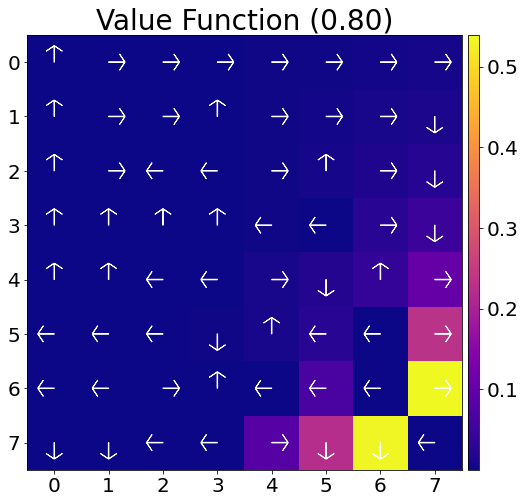

In [12]:
env.reset()
env.render()

gamma_list = [0.99, 0.95, 0.9, 0.8]
for gamma in gamma_list:
    policy, value, error_list = value_iteration(env,gamma)
    plot_results(policy, value, fig_title="Value Function ({:.02f})".format(gamma))

### Run optimal policy

In [5]:
obs = env.reset()
for t in range(10000):
    print('[Tick:%d]'%t)
    env.render()
    print('')
    action = np.random.choice(n_act, 1, p=policy[obs][:])[0]
    next_obs, reward, done, info = env.step(action)
    obs = next_obs
    if done:
        break
env.render()
env.close()

[Tick:0]

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:1]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:2]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:3]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:4]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:5]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:6]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:7]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:8]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:9]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:10]
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

[Tick:11]
  (Up)
SFF

# Numpy Version

Value iteration algorithm implemented using numpy functions

Value Iteration with Numpy
Computation Time : 0.04



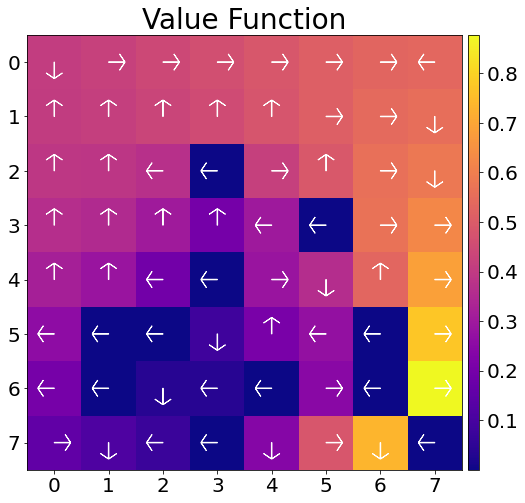

In [19]:
def value_iteration_np(env,gamma=0.99,epsilon=1e-6):
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    
    P = np.zeros((n_state,n_act,n_state))
    r = np.zeros((n_state,n_act,n_state))
    for s in env.unwrapped.P.keys(): # For all states s, update v(s)
        for a in env.unwrapped.P[s].keys(): # For all actions a
            for prob, next_s, reward, done in env.unwrapped.P[s][a]: # For all possible transitions (s,a,s')
                P[s][a][next_s]=prob
                r[s][a][next_s]=reward

    value = np.random.uniform(size=(n_state,))    
    while True: 
        # Compute Q value using Bellman update rule in matrix form
        # Compute maximum
        # Compute distance bewteen new value and prev value
        # Break if the terminate condition is satisfied
        break

    policy = np.zeros((n_state,n_act))
    policy[np.arange(n_state),np.argmax(q,axis=1)] = 1
    
    return policy, value

if __name__=='__main__': 
    print("Value Iteration with Numpy")
    import time
    start = time.time()
    policy, value = value_iteration_np(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    
    plot_results(policy, value)

# Let's see the first state S0

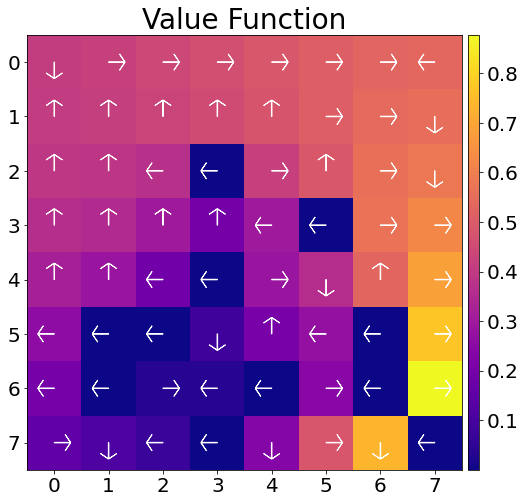

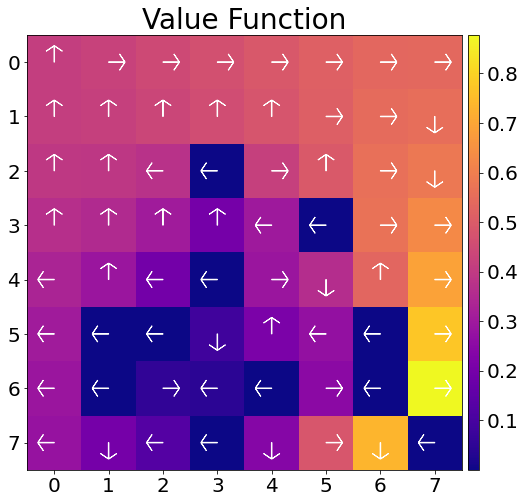

Q value (Numpy Version) :
[0.40483579 0.4096157  0.4096157  0.41030001]
Q value :
[0.40954981 0.41369621 0.41369621 0.41467101]


In [20]:
def v2q(env,value,gamma=0.99):
    # Extract World Information    
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    
    # Transition Probability
    P = env.unwrapped.P

    q = np.zeros((n_state,n_act)) # Compute Q value    
    for s in range(n_state): # For all states s
        for a in range(n_act): # For all actions a
            for prob, next_s, reward, done in P[s][a]: # For all possible transitions s'
                q[s,a] += (reward + gamma*value[next_s])*prob
    return q

policy_np, value_np = value_iteration_np(env)
policy, value, _ = value_iteration(env)

q_np = v2q(env,value_np)
q = v2q(env,value)

plot_results(policy_np, value_np)
plot_results(policy, value)

print("Q value (Numpy Version) :")
print(q_np[0])
print("Q value :")
print(q[0])

# Optimal Policy Distribution

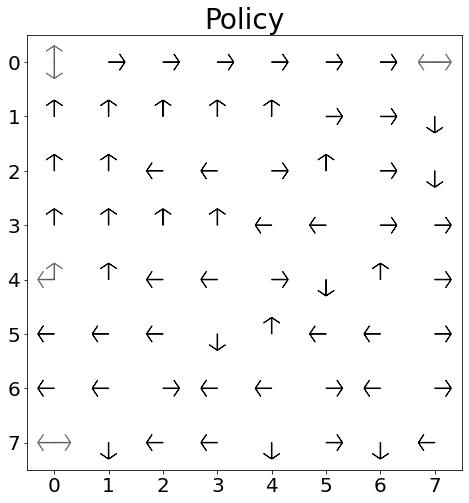

In [25]:
def plot_policy(policy,fig_title="Policy"):
    fig= plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.set_xticks(list(range(8)))
    ax.set_yticks(list(range(8)))
    plt.imshow(np.ones((8,8,3)))
    plt.title(fig_title,fontdict={'fontsize':28})  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="k",alpha=policy[s][0],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="k",alpha=policy[s][1],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="k",alpha=policy[s][2],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="k",alpha=policy[s][3],width=0.01,head_width=0.3,head_length=0.1,overhang=1)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()
    
policy_mixed = 0.5*policy + 0.5*policy_np
plot_policy(policy_mixed)